## Setup and Load Data

First, we retrieve the dataste from https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021.

If using the below cell, make sure you have a Kaggle API token in a `kaggle.json` file in `~/.kaggle/`. Otherwise, please download the data manually and place it under a folder `./data/`.

In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [504]:
moscow_df = pd.read_csv('data/Moscow.csv')

In [505]:
moscow_df.isnull().values.any()

False

In [506]:
moscow_df.sample(5)

,Unnamed: 0,price,date,building_type,level,levels,rooms,area,kitchen_area,object_type
30270,293584,9000000,2018,panel,22,25,3,80.0,10.0,preowned
174627,1731745,10750000,2019,brick,15,23,3,95.3,19.3,preowned
376939,4091186,6100000,2020,panel,6,9,3,62.0,7.4,preowned
86427,844812,4585680,2018,panel,17,25,1,39.6,18.1,new
247136,2516510,2800000,2019,panel,4,5,1,32.0,6.0,preowned


Some additional data cleaning

In [507]:
moscow_df.describe()

,Unnamed: 0,price,date,level,levels,rooms,area,kitchen_area
count,5.001920e+05,5.001920e+05,500192.000000,500192.00000,500192.000000,500192.000000,500192.000000,500192.000000
mean,2.629106e+06,4.765453e+06,2019.310803,7.05152,12.741489,1.782240,51.734531,10.364580
std,1.606013e+06,4.208466e+06,0.880217,5.71243,7.391100,0.864063,25.727061,7.177274
min,1.000000e+00,0.000000e+00,2018.000000,1.00000,1.000000,0.000000,1.000000,0.050000
25%,1.227914e+06,3.000000e+06,2019.000000,3.00000,5.000000,1.000000,38.000000,7.000000
50%,2.550342e+06,4.300000e+06,2019.000000,5.00000,12.000000,2.000000,46.200000,9.600000
75%,4.072241e+06,5.950000e+06,2020.000000,10.00000,17.000000,2.000000,62.000000,12.000000
max,5.476996e+06,2.147484e+09,2021.000000,36.00000,39.000000,9.000000,5000.000000,3000.000000


In [418]:
moscow_df = moscow_df[moscow_df['price'] > 0]

In [509]:
moscow_df = moscow_df[(moscow_df['kitchen_area']<moscow_df['area'])]

In [510]:
moscow_df.shape

(499867, 10)

Remove outliers using standard deviation

In [511]:
print("Highest allowed",moscow_df['price'].mean() + 3*moscow_df['price'].std())
print("Lowest allowed",moscow_df['price'].mean() - 3*moscow_df['price'].std())

Highest allowed 17394461.73105081
Lowest allowed -7861778.512738741


In [512]:
moscow_df=moscow_df[(moscow_df['price'] < 17390861.981078297)]

<Axes: >

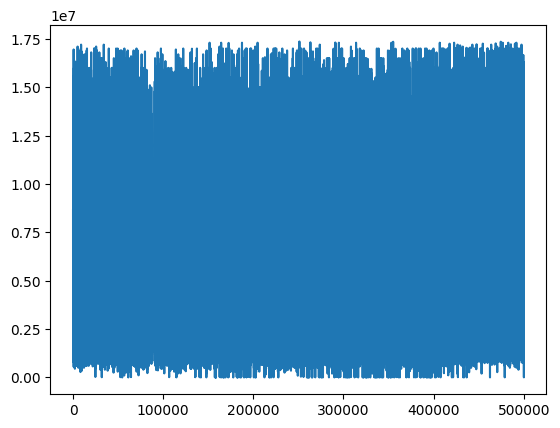

In [513]:
moscow_df['price'].plot()

In [514]:
moscow_df = pd.get_dummies(moscow_df, columns=['building_type', 'object_type'],dtype=int,drop_first=True)


In [518]:
moscow_df.describe()

,Unnamed: 0,price,date,level,levels,rooms,area,kitchen_area,building_type_brick,building_type_monolithic,building_type_other,building_type_panel,building_type_wooden,object_type_preowned
count,4.983360e+05,4.983360e+05,498336.000000,498336.000000,498336.000000,498336.000000,498336.000000,498336.000000,498336.000000,498336.000000,498336.000000,498336.000000,498336.000000,498336.000000
mean,2.626982e+06,4.695838e+06,2019.309630,7.049416,12.741448,1.776811,51.460134,10.312379,0.285578,0.319614,0.011639,0.366387,0.003102,0.755807
std,1.605609e+06,2.353911e+06,0.879894,5.710634,7.389206,0.857096,22.998968,4.611932,0.451690,0.466327,0.107253,0.481818,0.055612,0.429608
min,1.000000e+00,0.000000e+00,2018.000000,1.000000,1.000000,0.000000,2.240000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.227163e+06,3.000000e+06,2019.000000,3.000000,5.000000,1.000000,38.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.548818e+06,4.300000e+06,2019.000000,5.000000,12.000000,2.000000,46.100000,9.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.068950e+06,5.948732e+06,2020.000000,10.000000,17.000000,2.000000,61.800000,12.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,5.476996e+06,1.736218e+07,2021.000000,36.000000,39.000000,9.000000,5000.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Fitting

In [489]:
from sklearn.model_selection import train_test_split

X = moscow_df[['date', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'building_type_brick', 'building_type_monolithic','building_type_other','building_type_panel','building_type_wooden','object_type_preowned']]
y = moscow_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'{len(y_train)} train samples; {len(y_test)} test samples')

348833 train samples; 149501 test samples


Next, we will scale the data. Note that not all models require scaled data; while models like linear regression require scaling to avoid overemphasis of certain datapoints, models like descision trees (and, by extension, random forests) are not affected by unscaled variables.

It is also important to note that scaled data won't *negatively* impact descision trees, but we make a copy of scaled data to more explicitly demonstrate model understanding.

In [520]:
from sklearn.preprocessing import StandardScaler

ordinal_cols = ['date', 'level', 'levels', 'rooms', 'area', 'kitchen_area']
X_train_ordinal, X_test_ordinal = X_train[ordinal_cols], X_test[ordinal_cols]

scaler = StandardScaler()
scaler.fit(X_train_ordinal)

X_train_scaled, X_test_scaled = X_train, X_test

X_train_scaled.loc[:, scaler.feature_names_in_] = scaler.transform(X_train_ordinal)
X_test_scaled.loc[:, scaler.feature_names_in_] = scaler.transform(X_test_ordinal)

X_train_scaled.sample(5)

,date,level,levels,rooms,area,kitchen_area,building_type_brick,building_type_monolithic,building_type_other,building_type_panel,building_type_wooden,object_type_preowned
3298673,0.784912,-0.359891,0.575057,-0.906298,-0.731025,-0.285076,0,1,0,0,0,1
967811,-0.352433,-0.534842,-0.507343,2.595147,0.557987,-0.938260,0,0,0,1,0,1
4595181,0.784912,-0.534842,-0.372043,0.260850,0.557987,-0.067348,1,0,0,0,0,1
5356583,1.922256,-0.709794,-1.048543,-0.906298,-0.953269,-0.872941,0,0,0,1,0,1
2605939,-0.352433,-0.534842,-1.048543,0.260850,-0.179861,-0.829396,1,0,0,0,0,1


Trying Cart Regression using Decision Tree

In [491]:
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import metrics
from sklearn import tree # for decision tree models
from sklearn.ensemble import RandomForestRegressor

In [492]:
model = tree.DecisionTreeRegressor(criterion='squared_error', 
                                    splitter='best', 
                                    max_depth=15,
                                    min_samples_leaf=20, 
                                )
clf = model.fit(X_train, y_train)
clf.score(X_test,y_test)


0.692775748101222

Try with using Randomized Search to find good parameters

In [493]:
from sklearn.model_selection import RandomizedSearchCV

In [494]:
model = tree.DecisionTreeRegressor()

In [495]:
params = {'criterion': ['squared_error'],
            'max_depth': range(1, 50, 2),
             'min_samples_leaf': range(1, 50, 2)}
             

In [496]:
model_search = RandomizedSearchCV(model, params,n_jobs=-1)

In [497]:
model_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': range(1, 50, 2),
                                        'min_samples_leaf': range(1, 50, 2)})

In [498]:
model_search.best_params_

{'min_samples_leaf': 29, 'max_depth': 23, 'criterion': 'squared_error'}

In [499]:
best_model_tree = model_search.best_estimator_

In [500]:
y_pred = best_model_tree.predict(X_test)

In [501]:
model_search.score(X_test, y_pred)

1.0

In [502]:
metrics.mean_absolute_error(y_test, y_pred)

920394.5069100859

Trying Random Forest

In [425]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [527]:
forest_param = {'n_estimators': range(5, 15, 5), 'max_depth': range(1, 10, 2)}
forest_model = RandomForestRegressor(random_state=0)

In [528]:
forest_search = RandomizedSearchCV(forest_model, forest_param, n_jobs=-1)

In [529]:
forest_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
                   param_distributions={'max_depth': range(1, 10, 2),
                                        'n_estimators': range(5, 15, 5)})

In [530]:
forest_search.best_params_

{'n_estimators': 10, 'max_depth': 9}

In [531]:
best_forest_model = forest_search.best_estimator_

In [532]:
y_pred_forest = best_forest_model.predict(X_test_scaled)

In [533]:
metrics.r2_score(y_test, y_pred_forest)

0.675687628397059

In [534]:
metrics.mean_absolute_error(y_test, y_pred_forest)

977216.7917730961